The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


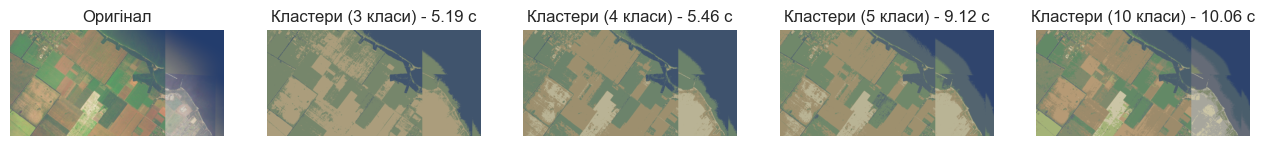

In [68]:
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# Завантажте зображення
image_path = r"D:\Andrii\styding\int_analitic_data\lab_2\image_2023-10-23_21-44-23.png"
image = mpimg.imread(image_path)

# Розміри зображення
height, width, channels = image.shape

# Розкладіть зображення
image_2d = image.reshape(-1, channels)

# Кількість кластерів для порівняння
num_clusters_list = [3, 4, 5, 10]

# Створимо папку для збереження
output_dir = 'clustered_images'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

# Виведемо декілька варіантів кластеризації одне під одним
fig, axs = plt.subplots(1, len(num_clusters_list) + 1, figsize=(16, 6))

# Оригінал
axs[0].imshow(image)
axs[0].axis('off')
axs[0].set_title('Оригінал')

for i, num_clusters in enumerate(num_clusters_list):
    start_time = time.time()
    # Використовуйте алгоритм K-Means для кластеризації
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    labels = kmeans.fit_predict(image_2d)

    # Отримайте центри кластерів
    cluster_centers = kmeans.cluster_centers_

    # Створіть зображення з кластерами
    clustered_image = cluster_centers[labels].reshape(height, width, channels)

    # Збереження кластеризованого зображення
    output_path = os.path.join(output_dir, f'clustered_{num_clusters}_clusters.png')
    mpimg.imsave(output_path, clustered_image)

    axs[i + 1].imshow(clustered_image)
    axs[i + 1].axis('off')
    axs[i + 1].set_title(f'Кластери ({num_clusters} класи) - {time.time() - start_time:.2f} с')

plt.show()

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Квантування з 64 рівнями глибини завершено за 72.88 с


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Квантування з 32 рівнями глибини завершено за 34.97 с


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Квантування з 16 рівнями глибини завершено за 15.35 с


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Квантування з 8 рівнями глибини завершено за 9.99 с


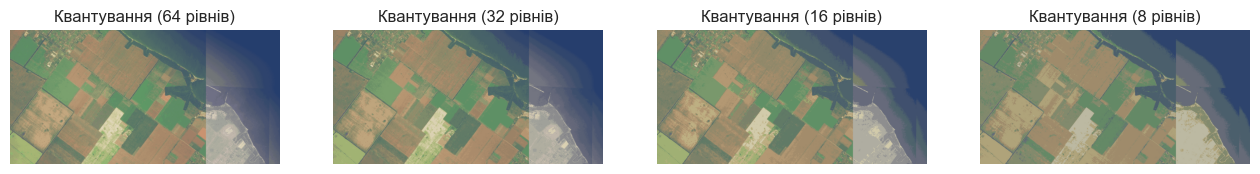

In [69]:
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# Завантажте зображення
image_path = r"D:\Andrii\styding\int_analitic_data\lab_2\image_2023-10-23_21-44-23.png"
image = mpimg.imread(image_path)

# Розміри зображення
height, width, channels = image.shape

# Розкладіть зображення
image_2d = image.reshape(-1, channels)

# Кількість рівнів глибини (кластерів)
depth_levels = [64, 32, 16, 8]

# Створимо папку для збереження
output_dir = 'quantized_images'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

for depth in depth_levels:
    start_time = time.time()
    # Використовуйте алгоритм K-Means для кластеризації
    kmeans = KMeans(n_clusters=depth, random_state=0)
    labels = kmeans.fit_predict(image_2d)

    # Отримайте центри кластерів
    cluster_centers = kmeans.cluster_centers_

    # Створіть квантоване зображення
    quantized_image = cluster_centers[labels].reshape(height, width, channels)

    # Збереження квантованого зображення
    output_path = os.path.join(output_dir, f'quantized_{depth}_depth.png')
    mpimg.imsave(output_path, quantized_image)

    print(f'Квантування з {depth} рівнями глибини завершено за {time.time() - start_time:.2f} с')

# Виведемо результати квантування
fig, axs = plt.subplots(1, len(depth_levels), figsize=(16, 6))
for i, depth in enumerate(depth_levels):
    quantized_image = mpimg.imread(os.path.join(output_dir, f'quantized_{depth}_depth.png'))
    axs[i].imshow(quantized_image)
    axs[i].axis('off')
    axs[i].set_title(f'Квантування ({depth} рівнів)')
plt.show()

In [77]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Завантажте зображення
image_path = r"D:\Andrii\styding\int_analitic_data\lab_2\image_2023-10-23_21-44-23.png"
image = mpimg.imread(image_path)

# Розміри зображення
height, width, channels = image.shape

# Розкладіть зображення
image_2d = image.reshape(-1, channels)

# Кількість кластерів (може бути налаштована)
n_clusters = 5

# Використовуйте DBSCAN для кластеризації
dbscan = DBSCAN(eps=20, min_samples=100)  # Налаштуйте параметри "eps" і "min_samples" відповідно до вашого зображення
labels = dbscan.fit_predict(image_2d)

# Створіть кластеризоване зображення
clustered_image = labels.reshape(height, width)

# Виведіть кластеризоване зображення
plt.figure(figsize=(8, 6))
plt.imshow(clustered_image, cmap='viridis')  # Змініть cmap на інший для кращого відображення кольорів
plt.axis('off')
plt.title(f'DBSCAN кластеризація ({len(np.unique(labels))} класи)')
plt.show()

MemoryError: 